In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # must add ()

In [6]:
# Data Normalization (so not 0 - 255 but 0 - 1)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

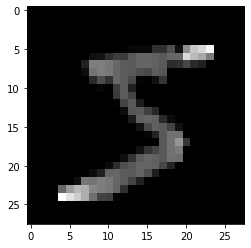

In [5]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # rather then pandas reshape, add directly to input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer, params are num of neurons, activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] ) # params of the training

2021-07-10 15:29:48.584068: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.fit(x_train, y_train, epochs=3)

2021-07-10 15:30:13.618012: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2614 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1085 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0742 - accuracy: 0.9769


Test on test data
don't want the accuracy and loss to be too different

In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0934 - accuracy: 0.9716
0.09344098716974258 0.9715999960899353


In [25]:
prediction = model.predict(x_test)
print(prediction[0])
print(np.argmax(prediction[0]))

[2.3898178e-08 3.4837385e-07 7.4596855e-06 8.2402425e-05 1.0885970e-08
 7.0013033e-07 3.1836862e-13 9.9984133e-01 2.8908843e-07 6.7404319e-05]
7


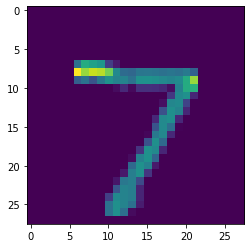

In [17]:
plt.imshow(x_test[0])
plt.show()